In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from colour import Color

In [2]:
num_paths = []
num_overlaps = []
with open("segment-10000.csv", newline="") as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    for row in reader:
        try:
            num_paths.append(int(row[5]))
            num_overlaps.append(int(row[6]) / int(row[5]))
        except ValueError:
            continue

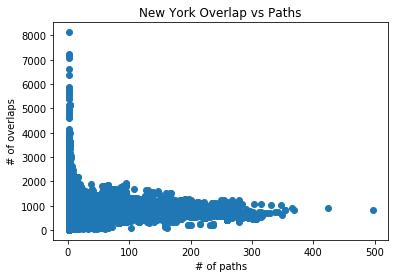

In [3]:
plt.title("New York Overlap vs Paths")
plt.scatter(num_paths, num_overlaps)
plt.ylabel("# of overlaps")
plt.xlabel("# of paths")
plt.show()

cdf(x) as discussed

cdf(x) = |#j: O_ij > x| / |#j in p_i|

In [4]:
def generate_cdf(data):
    index = 0
    sorted_data = sorted(data)
    cdf = []
    rg = np.arange(0.0, 1.0, granularity)
    for bound in rg:
        while index < len(sorted_data) and sorted_data[index] < bound:
            index += 1
        cdf.append((len(sorted_data) - index) / len(sorted_data))
    return cdf

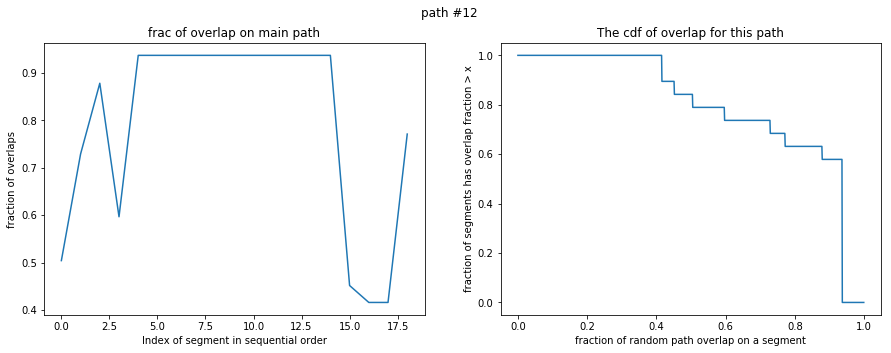

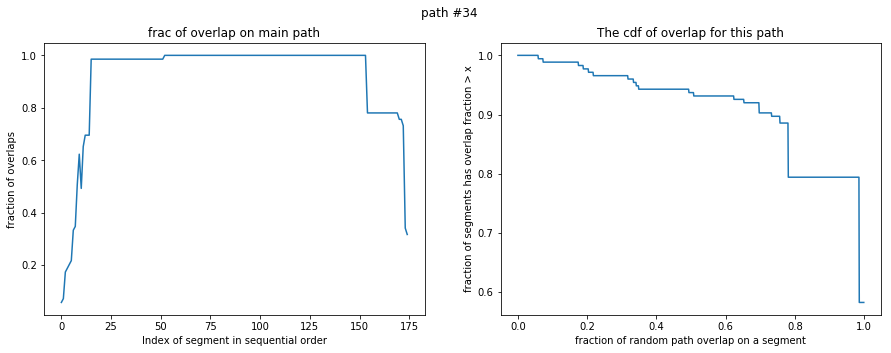

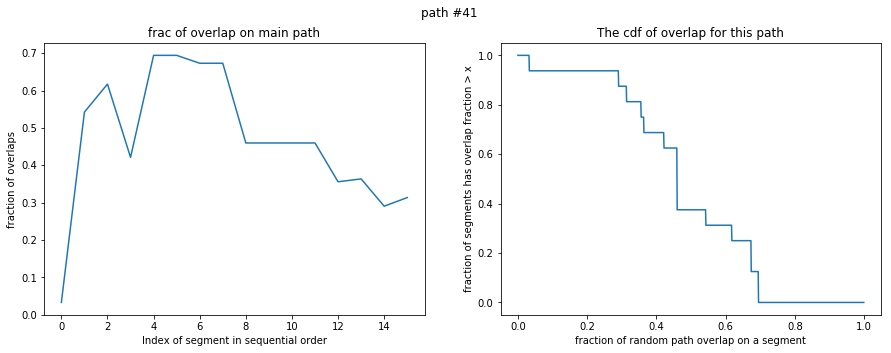

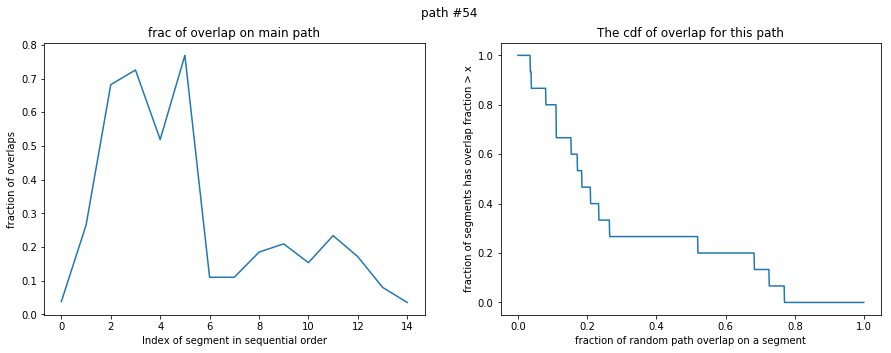

In [5]:
granularity = 0.001
paths = [12, 34, 41, 54]
rg = np.arange(0.0, 1.0, granularity)
with open("path.csv", "r") as f:
    lines = f.readlines()
    for line_num in paths:
        plt.figure(figsize=(15, 5))
        plt.suptitle("path #" + str(line_num))
        elements = lines[line_num].split(",")
        path_count = int(elements[0])
        seg_count = int(elements[1])
        seg_overlap = []
        for i in range(1, seg_count + 1):
            seg_overlap.append(int(elements[i * 2 + 1]) / path_count)
        plt.subplot(121)
        plt.title("frac of overlap on main path")
        plt.plot(seg_overlap)
        plt.xlabel("Index of segment in sequential order")
        plt.ylabel("fraction of overlaps")

        cdf = generate_cdf(seg_overlap)
        
        plt.subplot(122)
        plt.title("The cdf of overlap for this path")
        plt.plot(rg, cdf)
        plt.xlabel("fraction of random path overlap on a segment")
        plt.ylabel("fraction of segments has overlap fraction > x")
        plt.show()

In [6]:
def plot_map(segments, fig_size=(20, 20), width_rg=(2, 7), color_rg=("blue", "red")):
    """
    segments: np 2d matrix: the columns are start lat, start lon, end lat, end lon, line width raw, line color raw
    """
    colors = list(Color(color_rg[0]).range_to(Color(color_rg[1]), 100000))
    plt.figure(figsize=fig_size)
    mins = np.min(segments, axis=0)
    maxs = np.max(segments, axis=0)
    # normalize
    segments[:, 4] = (segments[:, 4] - mins[4]) / (maxs[4] - mins[4])
    segments[:, 5] = (segments[:, 5] - mins[5]) / (maxs[5] - mins[5])
    segments[:, 4] *= (width_rg[1] - width_rg[0])
    segments[:, 4] += width_rg[0]
    segments[:, 5] *= 99999
    for i in range(segments.shape[0]):
        plt.plot((segments[i, 1], segments[i, 3]),
                 (segments[i, 0], segments[i, 2]),
                 linewidth= segments[i, 4],
                 color=colors[int(segments[i, 5])].rgb)

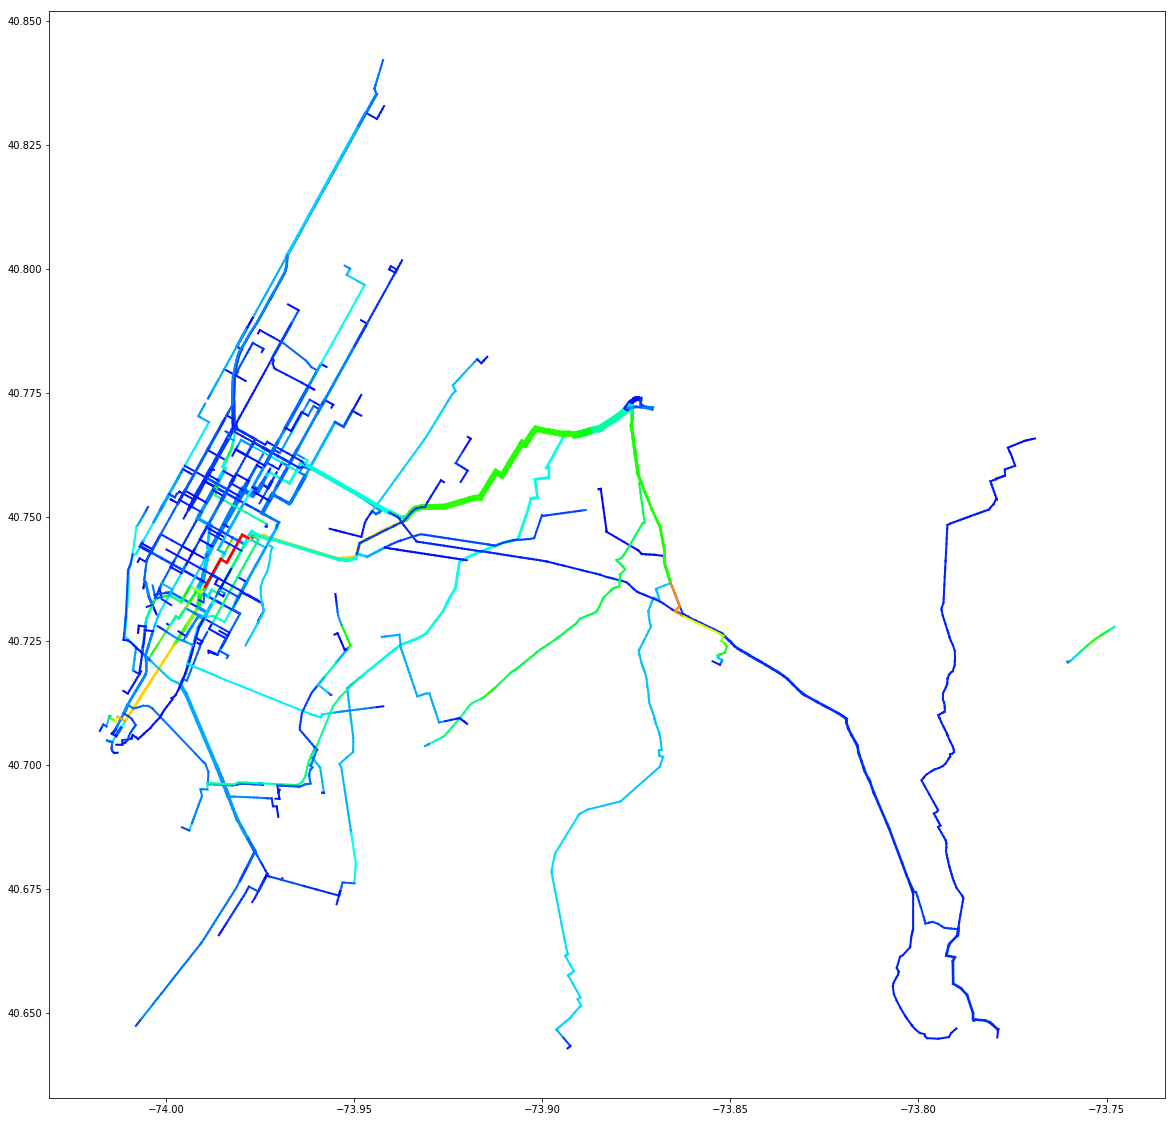

In [7]:
min_lat = 100
max_lat = -100
min_lon = 100
max_lon = -100
min_path = 100
max_path = 0
min_overlap = 100
max_overlap = 0
segments = []
fig_size = (20, 20)
with open("segment.csv", newline="") as csvfile:
    reader = csv.reader(csvfile, delimiter=",")
    for row in reader:
        try:
            start_lat = float(row[1])
            start_lon = float(row[2])
            end_lat = float(row[3])
            end_lon = float(row[4])
            num_path = int(row[5])
            num_overlap = int(row[6]) / num_path
            segments.append((start_lat, start_lon, end_lat, end_lon, num_path, num_overlap))
            min_lat = min(min(start_lat, end_lat), min_lat)
            max_lat = max(max(start_lat, end_lat), max_lat)
            min_lon = min(min(start_lon, end_lon), min_lon)
            max_lon = max(max(start_lon, end_lon), min_lon)
            min_path = min(min_path, num_path)
            max_path = max(max_path, num_path)
            min_overlap = min(min_overlap, num_overlap)
            max_overlap = max(max_overlap, num_overlap)
        except ValueError:
            continue
        
plot_map(np.array(segments, dtype=np.float64))
plt.show()

$$cdf(x; t) = \frac{\text{number of $p_i$ have at least x% of }s_{ij} \text{ with } \frac{\text{number of overlap}}{\text{number of segments}} > t}{\text{number of }p_i}$$

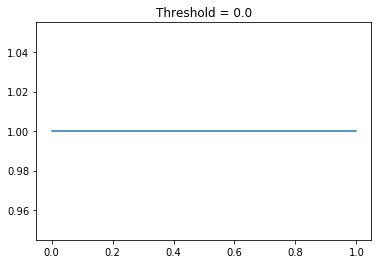

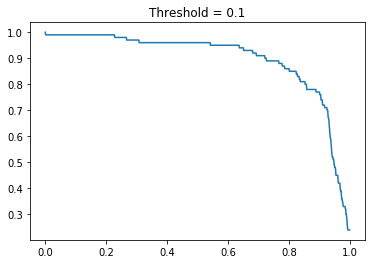

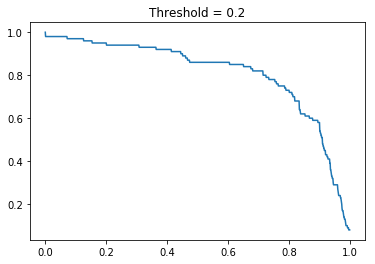

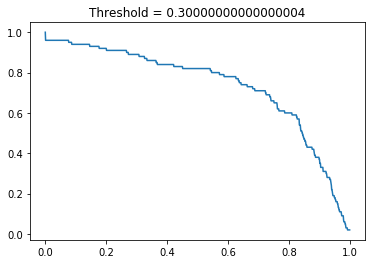

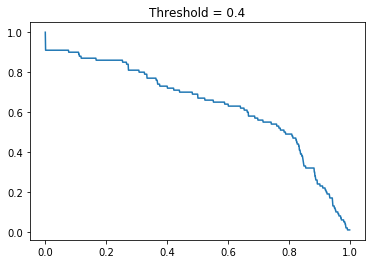

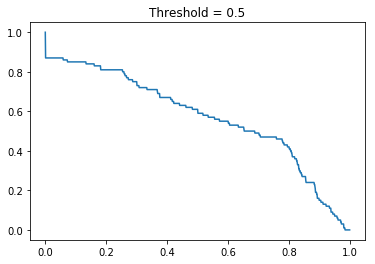

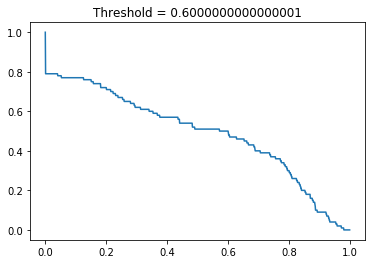

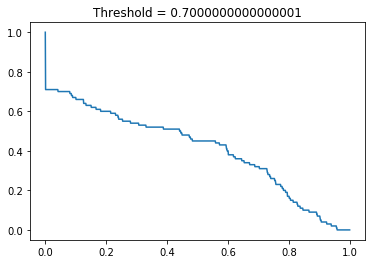

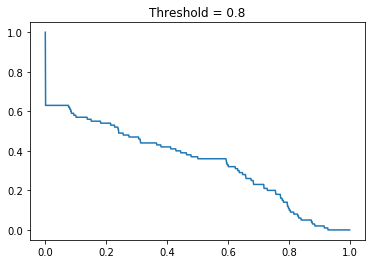

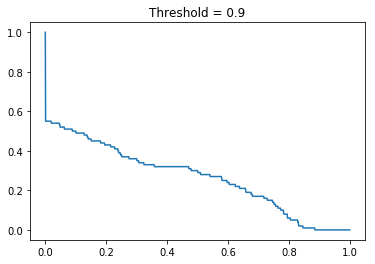

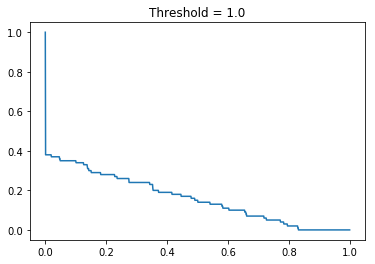

In [8]:
ts = np.arange(0, 1.1, 0.1)
granularity = 0.001
with open("path.csv", "r") as f:
    f.readline()
    lines = f.readlines()
    splited_lines = [line.split(",") for line in lines ]
    for i in range(len(splited_lines)):
        for j in range(len(splited_lines[i])):
            splited_lines[i][j] = int(splited_lines[i][j])
    for t in ts:
        plt.figure()
        path_overlap_count = []
        for line in splited_lines:
            path_count = line[0]
            seg_count = line[1]
            count = 0
            for i in range(1, seg_count + 1):
                if line[i * 2 + 1] / path_count > t:
                    count += 1
            path_overlap_count.append(count / seg_count)
        cdf = generate_cdf(path_overlap_count)
        plt.title("Threshold = " + str(t))
        plt.plot(rg, cdf)
    plt.show()

Plot of segments for which the width is the number of $p_i$ go through it and have at least x% of $s_{ij}$ with $\frac{\text{number of overlap}}{\text{number of generated path}} > t$, and the color is the average of number of overlaps for those $p_i$ on this segment.

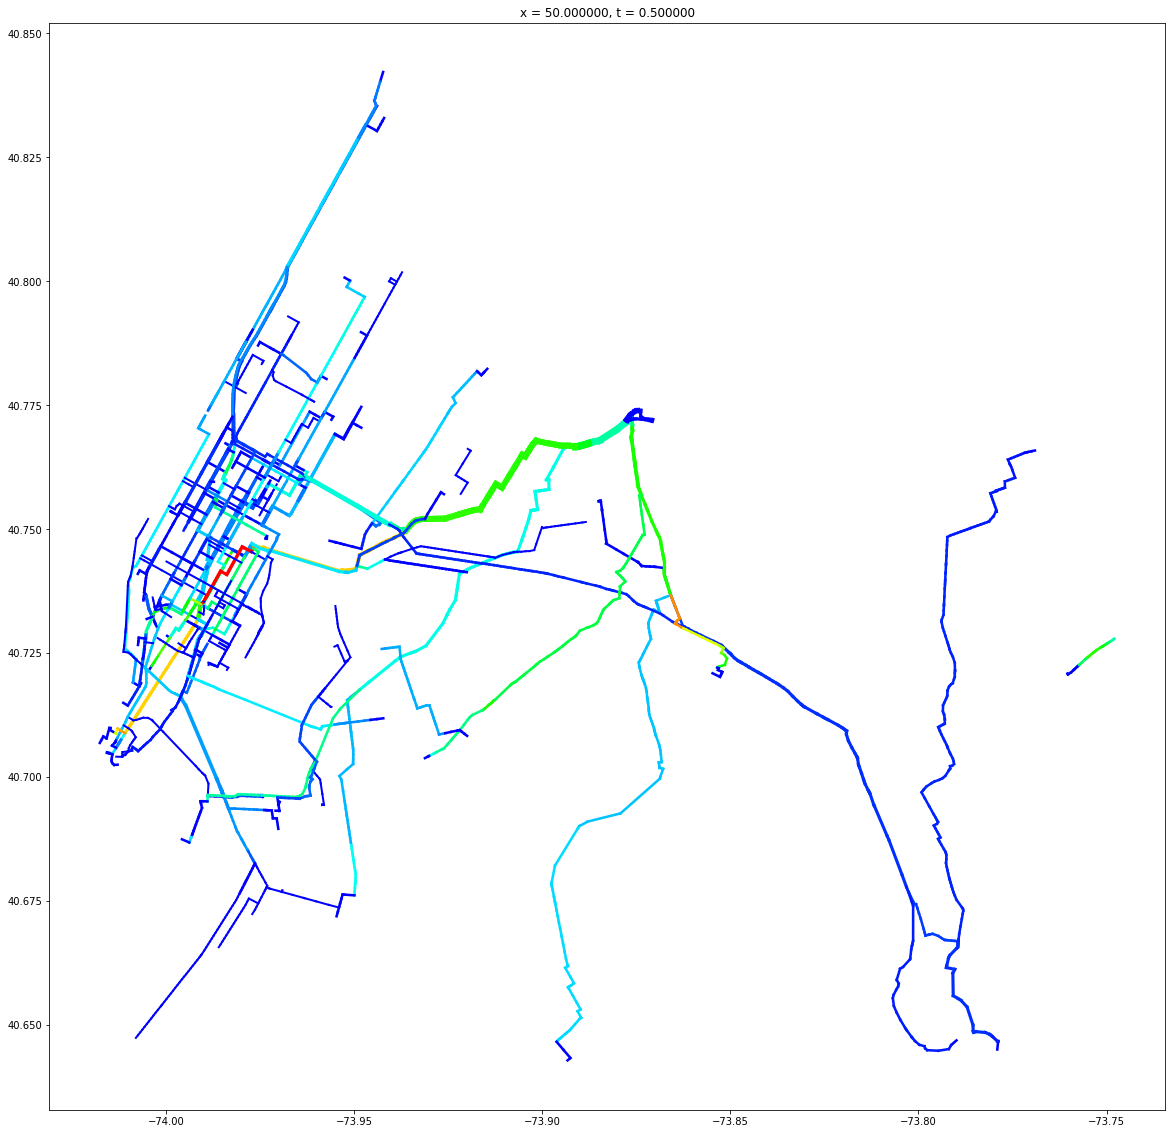

In [9]:
ts = np.arange(0, 1.1, 0.1)
x = 50
t = 0.5

def get_seg_id_map(file_path):
    seg_id_map = {}
    with open(file_path, "r") as f:
        f.readline()
        lines = f.readlines()
        for line in lines:
            elements = line.split(",")
            seg_id_map[int(elements[0])] = (
                float(elements[1]), float(elements[2]),
                float(elements[3]), float(elements[4]),
                int(elements[5]), int(elements[6])
            )
    return seg_id_map
            
seg_id_map = get_seg_id_map("segment.csv")

splitted_lines = None
with open("path.csv", "r") as f:
    f.readline()
    lines = f.readlines()
    splitted_lines = [line.split(",") for line in lines ]
    for i in range(len(splited_lines)):
        for j in range(len(splitted_lines[i])):
            splitted_lines[i][j] = int(splitted_lines[i][j])
            
def get_seg_stats(splitted_lines, x, t):
    seg_popularity_counter = {}
    seg_total_overlap_counter = {}
    for line in splitted_lines:
        total_paths = line[0]
        num_segs = line[1]
        temp_counter = {}
        for i in range(1, num_segs + 1):
            seg_id = line[i * 2]
            num_overlap = line[i * 2 + 1]
            if num_overlap / total_paths > t:
                if not (seg_id in temp_counter):
                    temp_counter[seg_id] = 0
                temp_counter[seg_id] += num_overlap  ## What if one path contains a segment twice

        if len(temp_counter) / num_segs > x / 100:
            for seg_id in temp_counter:
                if not (seg_id in seg_total_overlap_counter):
                    seg_total_overlap_counter[seg_id] = 0
                seg_total_overlap_counter[seg_id] += temp_counter[seg_id]
            for i in range(1, num_segs + 1):
                seg_id = line[i * 2]
                if not (seg_id in seg_popularity_counter):
                    seg_popularity_counter[seg_id] = 0
                seg_popularity_counter[seg_id] += 1  ## This path goes through the segment
    return seg_popularity_counter, seg_total_overlap_counter

def draw_this_map(x, t, seg_id_map, splitted_lines):
    seg_popularity_counter, seg_total_overlap_counter = get_seg_stats(splitted_lines, x, t)
    segments = []
    for seg_id in seg_id_map:
        segment_info = seg_id_map[seg_id]
        if seg_id in seg_popularity_counter:
            num_path = seg_popularity_counter[seg_id]
        else:
            num_path = 0
        if (seg_id in seg_total_overlap_counter) and num_path > 0:
            num_overlaps = seg_total_overlap_counter[seg_id] / num_path
        else:
            num_overlaps = 0
        segments.append([
            segment_info[0], segment_info[1],
            segment_info[2], segment_info[3],
            num_path, num_overlaps
        ])

    plot_map(np.array(segments, dtype=np.float64))
    plt.title("x = %f, t = %f" % (x, t))
    plt.show()
    
draw_this_map(x, t, seg_id_map, splited_lines)

In [10]:
## the Voronoi diagram
import scipy.spatial as spsp
seg_id_map = get_seg_id_map("segment.csv")
path_points = []
splitted_lines = None
with open("path-10000.csv", "r") as f:
    f.readline()
    lines = f.readlines()
    splitted_lines = [line.split(",") for line in lines ]
    for i in range(len(splited_lines)):
        for j in range(len(splitted_lines[i])):
            splitted_lines[i][j] = int(splitted_lines[i][j])
for path in splited_lines:
    start = seg_id_map[path[2]]
    end = seg_id_map[path[len(path) - 2]]
    path_points.append((start[0], start[1]))
    path_points.append((end[2], end[3]))

points = []
point_dict = {}
for seg_id in seg_id_map:
    seg = seg_id_map[seg_id]
    if not ((seg[1], seg[0]) in point_dict):
        point_dict[(seg[1], seg[0])] = 0
        points.append((seg[1], seg[0]))
    if not ((seg[3], seg[2]) in point_dict):
        point_dict[(seg[3], seg[2])] = 0
        points.append((seg[3], seg[2]))
        
np_path_point = np.array(path_points)
orig_fig = plt.figure(figsize=(100, 100))
ax = orig_fig.add_subplot(111)
ax.scatter(np_path_point[:, 1], np_path_point[:, 0], c="y", linewidths=5)
vor = spsp.Voronoi(points)
spsp.voronoi_plot_2d(vor, ax, show_points=True, show_vertices=False)
plt.savefig("Voronoi.png")

/usr/lib/python3.6/site-packages/scipy/spatial/_plotutils.py:20: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  was_held = ax.ishold()


In [11]:
vor.vertices

array([[-73.55705077,  26.09089451],
       [-75.27952498,  41.70389342],
       [-75.27212795,  41.69883509],
       ...,
       [-73.87027602,  40.73342579],
       [-73.87121144,  40.73412804],
       [-73.87124479,  40.7339911 ]])